In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pickle import load

In [2]:
SCRIPTPATH = '/Users/marcosaponara/Documents/GitHub/centipede-bias/mysrc/utils/script3.py'
Z=100

In [3]:
!python $SCRIPTPATH --expref 'KT2012' --popsize $Z

/Users/marcosaponara/opt/anaconda3/lib/python3.9/site-packages/egttools/utils.py:214: RuntimeWarning: Some of the entries in the transition matrix are close to 1 (with a tolerance of 1e-11). This could result in more than one eigenvalue of magnitute 1 (the Markov Chain is degenerate), so please be careful when analysing the results.
  warn(
dictionary saved successfully to file ./results/fig3-Z=100-nbstep=6-refKT2012.pkl


In [4]:
!python $SCRIPTPATH --expref 'MP1992' --popsize $Z

/Users/marcosaponara/opt/anaconda3/lib/python3.9/site-packages/egttools/utils.py:214: RuntimeWarning: Some of the entries in the transition matrix are close to 1 (with a tolerance of 1e-11). This could result in more than one eigenvalue of magnitute 1 (the Markov Chain is degenerate), so please be careful when analysing the results.
  warn(
dictionary saved successfully to file ./results/fig3-Z=100-nbstep=6-refMP1992.pkl


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


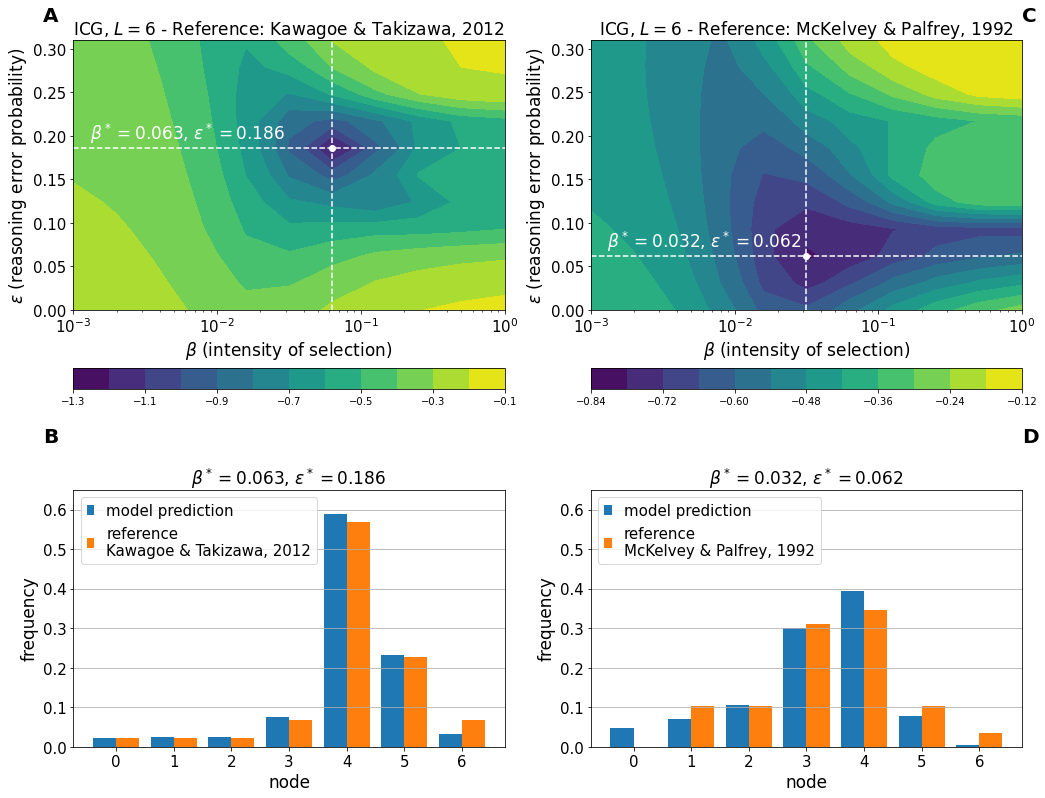

In [5]:
nb_steps = 6
refs = ['Kawagoe & Takizawa, 2012', 'McKelvey & Palfrey, 1992']

fig, ax = plt.subplots(2,2, figsize=(17, 13), gridspec_kw={'height_ratios': [3,2]})

X = [str(t) for t in range(nb_steps+1)]
X_axis = np.arange(len(X))

ax[0,0].set_title(r'ICG, $L=6$ - Reference: '+refs[0], fontsize=17)
ax[0,1].set_title(r'ICG, $L=6$ - Reference: '+refs[1], fontsize=17)


for n, ref in enumerate(['KT2012', 'MP1992']):
    file_name = f'./results/fig3-Z={Z}-nbstep={nb_steps}-ref{ref}.pkl'
    with open(file_name, 'rb') as f:
        res = load(f)
    beta_values = res['beta_values']
    eps_values = res['eps_values']
    js = res['js']
    best_fit=res['best_fit']
    beta_best_fit = res['beta_best_fit']
    eps_best_fit = res['eps_best_fit']
    experimental_reference = res['experimental_reference']
    
    tmp = ax[0,n].contourf(beta_values, eps_values, np.log10(js), cmap='viridis', levels=11)
    ax[0,n].plot(beta_best_fit, eps_best_fit, marker='o', color='white')
    ax[0,n].axhline(eps_best_fit, linestyle='--', color='white',)
    ax[0,n].axvline(beta_best_fit, linestyle='--', color='white',)
    ax[0,n].text(0.0013, eps_best_fit+0.01, r'$\beta^*=$'+str(np.round(beta_best_fit,3))+r', $\epsilon^*=$'+str(np.round(eps_best_fit,3)), color='white', fontsize=17)
    ax[0,n].set_xscale('log')
    #ax[0,n].set_yscale('log')
    ax[0,n].set_xlabel(r'$\beta$ (intensity of selection)', fontsize=17)
    ax[0,n].set_ylabel(r'$\epsilon$ (reasoning error probability)', fontsize=17)
    fig.colorbar(tmp, ax=ax[0,n], location='bottom')


    ax[1,n].grid(axis='y')
    ax[1,n].bar(X_axis - 0.2, best_fit, 0.4, label ='model prediction')
    ax[1,n].bar(X_axis + 0.2, experimental_reference, 0.4, label = 'reference\n'+refs[n])
    ax[1,n].set_xticks(X_axis, X)
    ax[1,n].set_xlabel('node', fontsize=17)
    ax[1,n].set_ylabel('frequency', fontsize=17)
    ax[1,n].set_ylim(0., .65)
    ax[1,n].legend(fontsize=15,handlelength=.5, loc='upper left')
    
    ax[1,n].set_title(r'$\beta^*=$'+str(np.round(beta_best_fit,3))+r', $\epsilon^*=$'+str(np.round(eps_best_fit,3)), fontsize=17)
    
fig.text(0.1, .9, 'A', fontsize=20, fontweight='heavy')
fig.text(.9, .9, 'C', fontsize=20, fontweight='heavy')
fig.text(0.1, .45, 'B', fontsize=20, fontweight='heavy')
fig.text(.9, .45, 'D', fontsize=20, fontweight='heavy')    

ax[0,0].xaxis.set_tick_params(labelsize=15)
ax[1,0].xaxis.set_tick_params(labelsize=15)
ax[0,1].xaxis.set_tick_params(labelsize=15)
ax[1,1].xaxis.set_tick_params(labelsize=15)

ax[0,0].yaxis.set_tick_params(labelsize=15)
ax[1,0].yaxis.set_tick_params(labelsize=15)
ax[0,1].yaxis.set_tick_params(labelsize=15)
ax[1,1].yaxis.set_tick_params(labelsize=15)
    
plt.savefig(f'./figures/icg6-fitting-Z{Z}.png', format='png')
plt.savefig(f'./figures/icg6-fitting-Z{Z}.eps', format='eps')
plt.show()